<a href="https://colab.research.google.com/github/jinnykj/PokemonGO-Review-dataset-analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B8%B0%EB%A7%90_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [2]:
uploaded = files.upload()

Saving pokemon_reviews.xlsx to pokemon_reviews.xlsx


In [3]:
data = pd.read_excel('pokemon_reviews.xlsx')

In [ ]:
data.head()

,userName,content,score,reviewCreatedVersion
0,Neymar Jr,The most useless game ever. Spent so much mone...,1,0.29.0
1,A Google user,So many bugs and issues and the gameplay is qu...,1,0.29.0
2,A Google user,This game would be great if they could get the...,3,0.29.0
3,A Google user,"Had to uninstall game do to a bad update, now ...",4,0.29.0
4,A Google user,Will not recognize my account. Changed the pas...,1,0.29.0


In [4]:
df = data.drop(columns='userName')

In [5]:
df.reset_index(inplace=True)

In [6]:
df.dropna()

,index,content,score,reviewCreatedVersion
0,0,The most useless game ever. Spent so much mone...,1,0.29.0
1,1,So many bugs and issues and the gameplay is qu...,1,0.29.0
2,2,This game would be great if they could get the...,3,0.29.0
3,3,"Had to uninstall game do to a bad update, now ...",4,0.29.0
4,4,Will not recognize my account. Changed the pas...,1,0.29.0
...,...,...,...,...
108539,108539,Logan Brierley 9,3,0.263.0
108540,108540,Got me outside,5,0.263.0
108541,108541,Still no fix for galaxy fold 4. Unable to conn...,1,0.263.1
108542,108542,still can't connect to nintendo switch for my ...,1,0.263.1


In [7]:
averagescore = df.groupby('reviewCreatedVersion')['score'].mean().reset_index()

In [8]:
averagescore.drop(index=range(173, 223))

,reviewCreatedVersion,score
0,0.101.1,2.923077
1,0.103.3,3.350000
2,0.103.5,4.000000
3,0.105.0,3.322581
4,0.105.1,3.468750
...,...,...
168,0.261.0,3.221461
169,0.261.1,3.219963
170,0.261.2,3.500000
171,0.261.3,3.311801


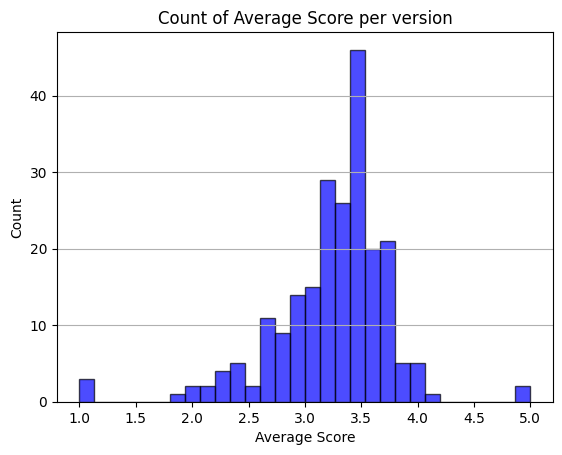

In [76]:
avsc = averagescore['score']
plt.hist(avsc,bins=30,alpha=0.7,color='blue',edgecolor='black')
plt.title('Count of Average Score per version')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [19]:
reviewcount = df.groupby('reviewCreatedVersion')['content'].count().reset_index()

In [20]:
reviewcount

,reviewCreatedVersion,content
0,0.101.1,13
1,0.103.3,20
2,0.103.5,6
3,0.105.0,31
4,0.105.1,32
...,...,...
218,0.93.3,1
219,0.93.4,33
220,0.95.3,15
221,0.97.2,35


In [49]:
reviewcount['content']

,content
0,13
1,20
2,6
3,31
4,32
...,...
218,1
219,33
220,15
221,35


In [51]:
df['category'] = pd.cut(df['score'], bins=[0, 2, 3, 5], labels=['bad', 'soso', 'good'])

# 버전별로 각 범주의 개수를 세기
category= df.groupby(['reviewCreatedVersion', 'category']).size().unstack(fill_value=0).reset_index()
category['count']=reviewcount['content']

<ipython-input-51-91c41d56dd98>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category= df.groupby(['reviewCreatedVersion', 'category']).size().unstack(fill_value=0).reset_index()


In [71]:
category=category.drop(index=range(173, 223))

In [72]:
category

category,reviewCreatedVersion,bad,soso,good,count
0,0.101.1,5,3,5,13
1,0.103.3,7,3,10,20
2,0.103.5,1,1,4,6
3,0.105.0,9,6,16,31
4,0.105.1,8,6,18,32
...,...,...,...,...,...
168,0.261.0,163,57,218,438
169,0.261.1,207,63,271,541
170,0.261.2,117,45,218,380
171,0.261.3,286,98,421,805


In [56]:
top15 = category.sort_values(by='count',ascending=False).iloc[:15,].reset_index()

In [57]:
top15.drop(columns='index')

category,reviewCreatedVersion,bad,soso,good,count
0,0.215.1,1257,175,602,2034
1,0.251.2,541,220,956,1717
2,0.183.0,538,239,871,1648
3,0.195.2,572,237,814,1623
4,0.191.2,425,212,872,1509
5,0.189.0,587,209,690,1486
6,0.123.2,298,189,962,1449
7,0.177.1,518,188,704,1410
8,0.187.1,532,185,655,1372
9,0.151.0,334,119,872,1325


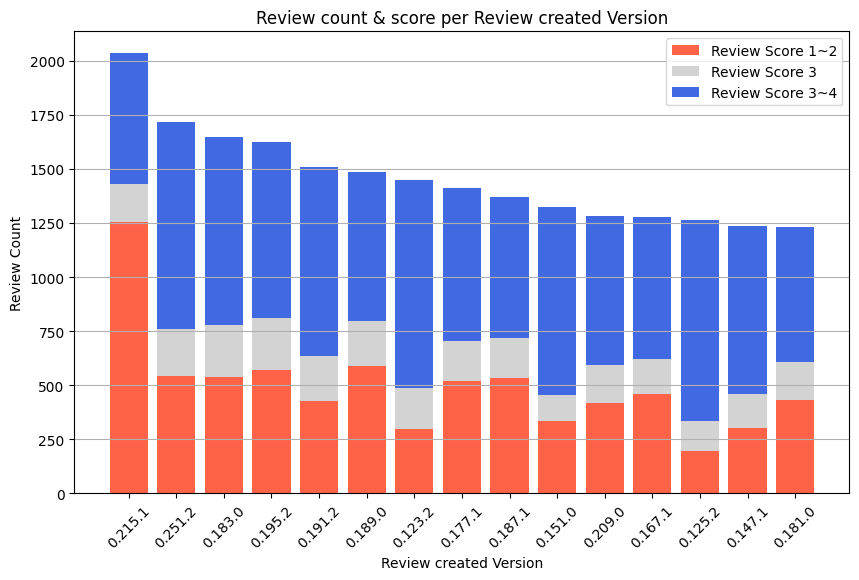

In [80]:
months = top15['reviewCreatedVersion']
Scorebad = top15['bad']
Scoresoso = top15['soso']
Scoregood= top15['good']



plt.figure(figsize=(10,6))
plt.bar(months,Scorebad,label='Review Score 1~2',color='tomato')
plt.bar(months,Scoresoso,bottom = Scorebad , label='Review Score 3',color='lightgray')
plt.bar(months,Scoregood,bottom = Scorebad+Scoresoso , label='Review Score 3~4',color='royalblue')



plt.title('Review count & score per Review created Version')
plt.xlabel('Review created Version')
plt.ylabel('Review Count')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

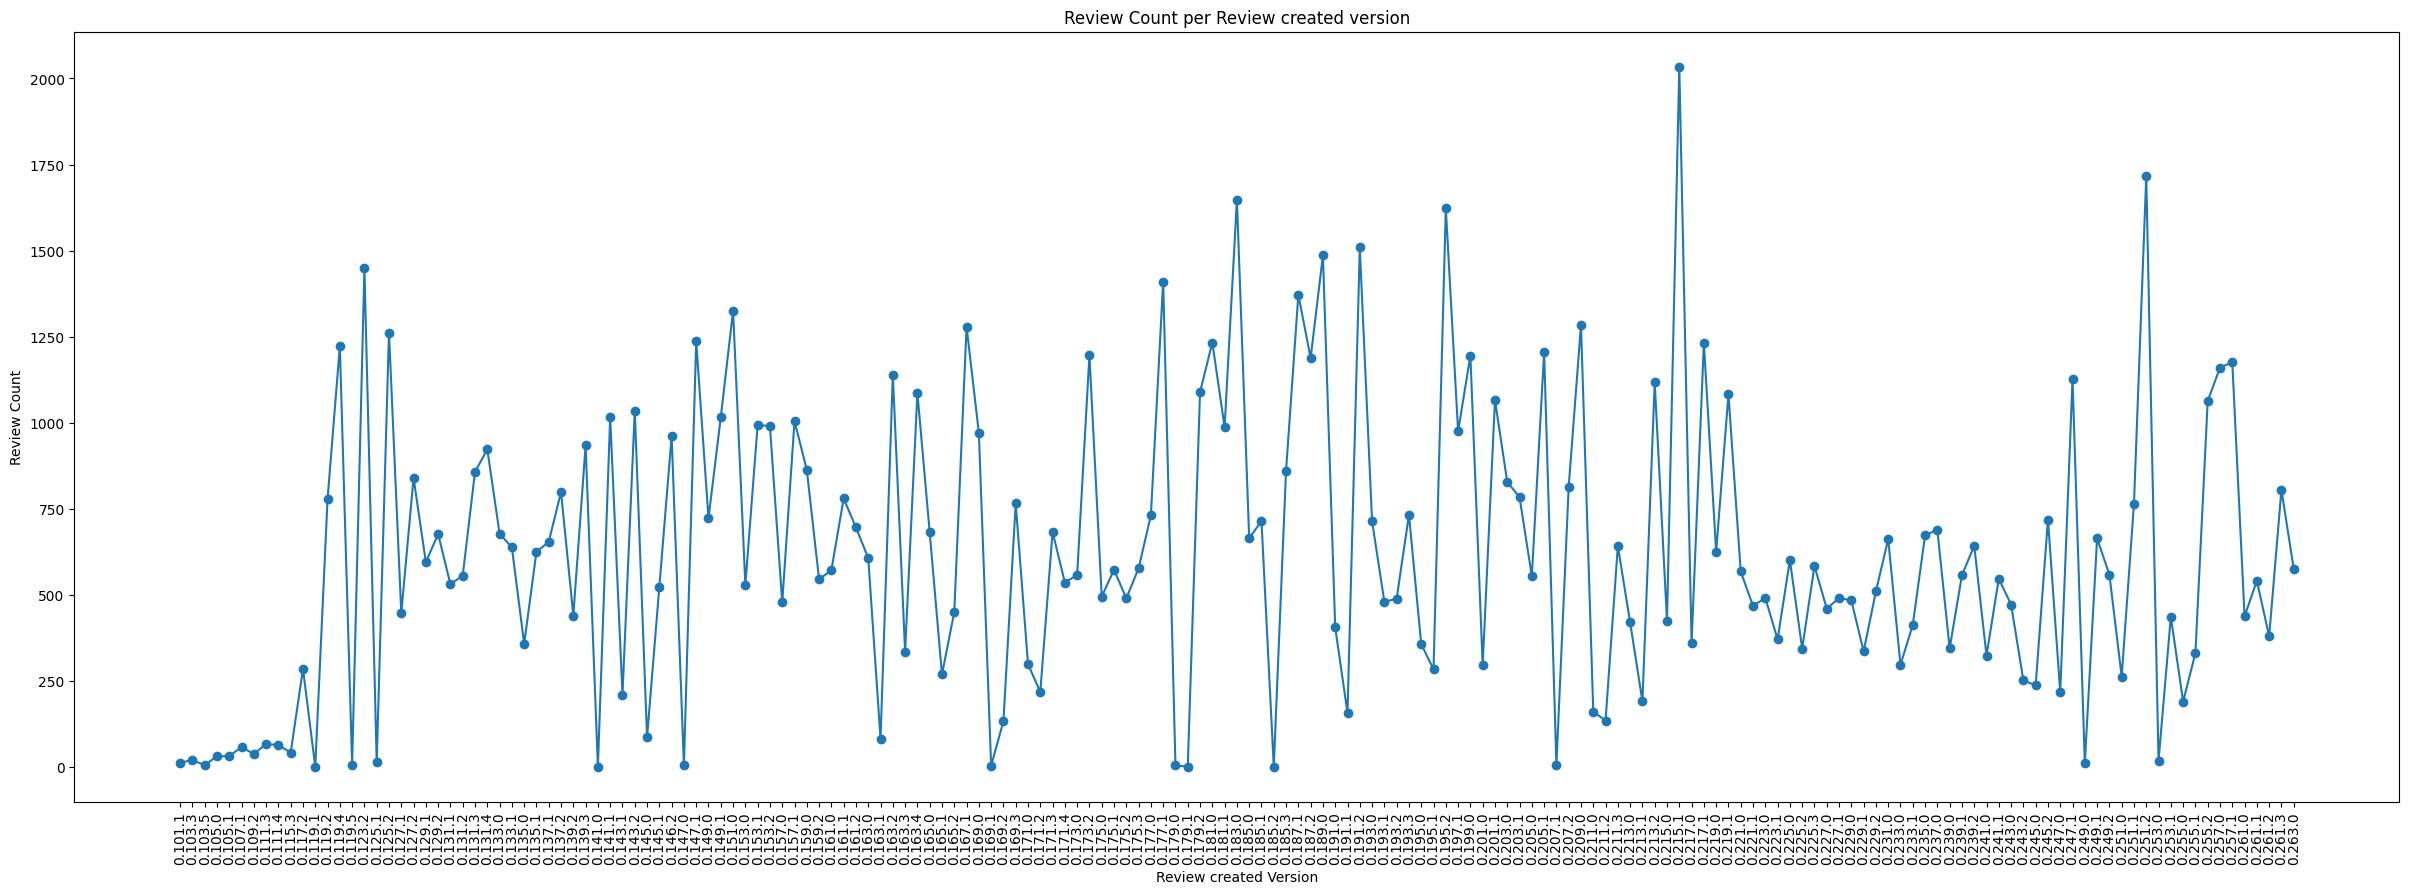

In [74]:
x =category['reviewCreatedVersion']
y=category['count']
plt.figure(figsize=(30,10))

plt.plot(x, y, marker = 'o')
plt.title('Review Count per Review created version')
plt.xlabel('Review created Version')
plt.ylabel('Review Count')
plt.xticks(rotation=90)
plt.show()